![Py4Eng](https://dl.dropboxusercontent.com/u/1578682/py4eng_logo.png)

# Image processing
## Yoav Ram

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, misc
import seaborn as sns
sns.set(
    style='white',
    context='talk'
)

def display_image(image):
    plt.imshow(image, cmap='gray')
    plt.xticks([])
    plt.yticks([])

# Denoising

Here's a salt-and-pepper noisy image of a famous person:

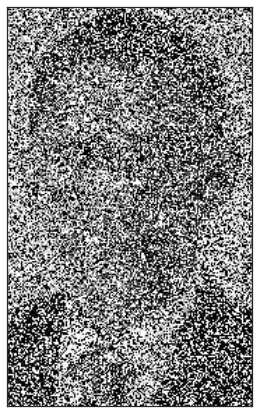

In [116]:
noisy = np.loadtxt(r'..\data\noisy.bitmap')
display_image(noisy)

[![SciPy logo](http://space-kerala.org/freeelectron/wp-content/uploads/2013/11/scipyshiny_small.png)](http://scipy.org)

First let's try to denoise it with Scipy's median filter:

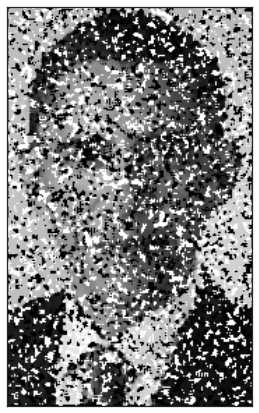

In [117]:
denoised = signal.medfilt2d(noisy)
display_image(denoised)

[![scikit-image](http://scikit-image.org/docs/stable/_static/img/logo.png)](http://scikit-image.org/)

Now using `scikit-image`

In [118]:
from skimage import filters
from skimage.morphology import square

In [119]:
noisy.dtype

dtype('float64')

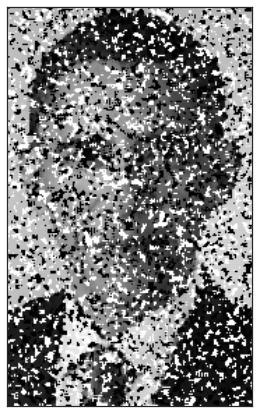

In [130]:
display_image(filters.median(noisy.astype(np.uint16), square(3)))

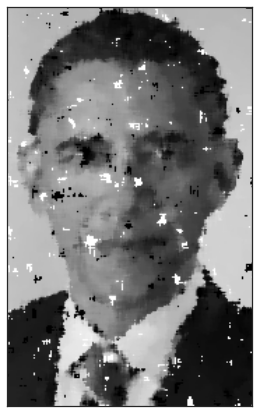

In [129]:
display_image(filters.median(noisy.astype(np.uint16), square(7)))

Now let's apply our own bounded median filter:

In [139]:
def local_medians_bounded(image, k=1, black=10, white=250):
    n, m = image.shape
    res1 = image.copy()
    #fix white
    for i in range(k, n - k):
        for j in range(k, m - k):
            neighborhood = image[max(i - k, 0):min(i + k + 1, n), max(j - k, 0):min(j + k + 1, m)]
            assert neighborhood.size
            res1[i, j] = fix_white(neighborhood, white)
    #fix black        
    res2 = res1.copy()
    for i in range(k, n - k):
        for j in range(k, m - k):
            neighborhood = res1[max(i - k, 0):min(i + k + 1, n), max(j - k, 0):min(j + k + 1, m)]
            assert neighborhood.size
            res2[i, j] = fix_black(neighborhood, black)
    return res2

def fix_white(arr, white_thr):
    arr = arr.flatten()
    center = arr.size // 2
    if arr[center] > white_thr:
        bounded = arr[arr <= white_thr]
        if bounded.size:
            return np.median(bounded)
    return arr[center]  #either center was not extreme or all its neighbors are extreme

def fix_black(arr, black_thr):
    arr = arr.flatten()
    center = arr.size // 2
    if arr[center] < black_thr:
        bounded = arr[arr >= black_thr]
        if bounded.size:
            return np.median(bounded)
    return arr[center]  #either center was not extreme or all its neighbors are extreme

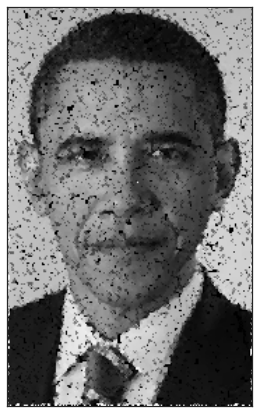

In [140]:
denoised = local_medians_bounded(noisy)
display_image(denoised)

## Adding salt and pepper noise

Here's how the noise was added in the first place:

In [148]:
def salt_pepper(image, p=0.01):
    """Generates salt and pepper noise.
    
    Each pixel is "hit" independently with probability `p`. 
    If hit, a pixel has 1:1 chance of becoming white or black.
    """
    noisy = image.copy()
    rand = np.random.random(size=noisy.shape)
    idx = rand <= p/2
    noisy[idx] = 0
    idx = (p/2 < rand) & (rand <= p)
    noisy[idx] = 255
    return noisy

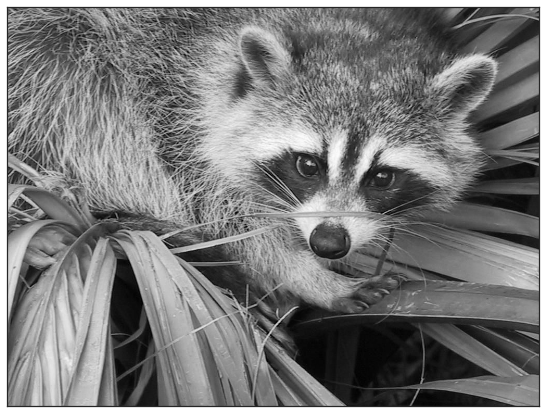

In [147]:
image = misc.face(gray=True)
display_image(image)

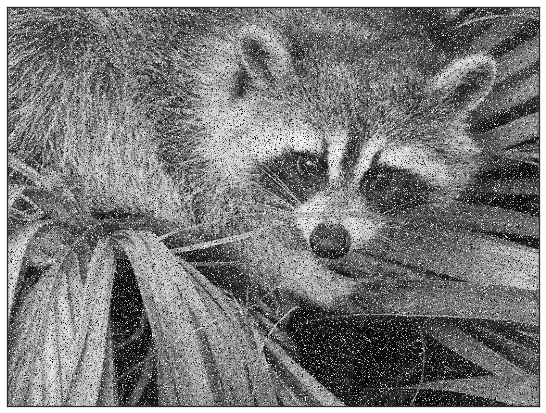

In [149]:
display_image(salt_pepper(image, p=0.2))

# Gaussian filter

Let's apply a gaussian filter for blurring. We'll use this image:

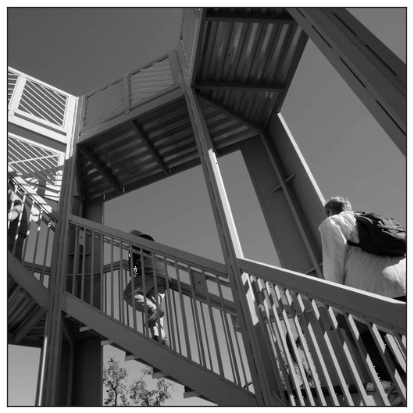

In [151]:
image = misc.ascent()
display_image(image)

## scipy.signal

We define a gaussian window using `scipy.signal.gaussian` of width 50 and $\sigma=10$:

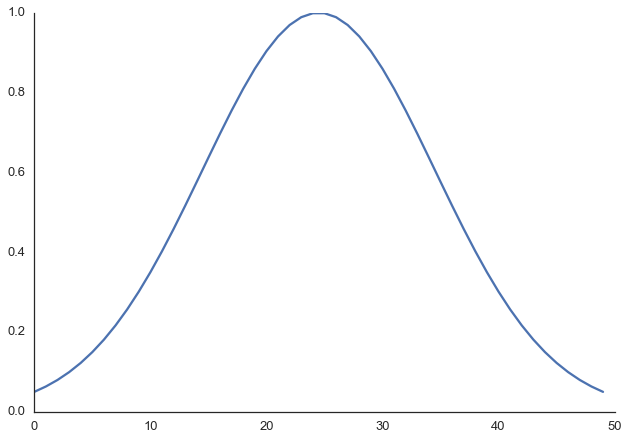

In [152]:
window = signal.gaussian(50, 10)
plt.plot(window)
sns.despine()

Because the 2D gaussian filter can be described by the product of two 1D functions, we can use the function `scipy.signal.sepfir2d` to apply the filter:

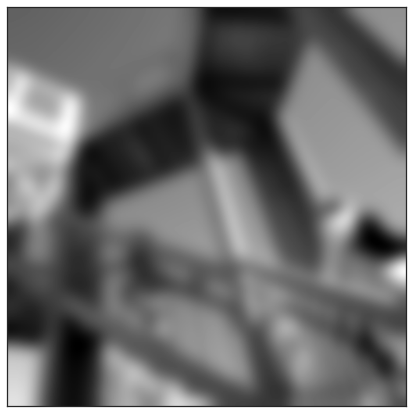

In [153]:
blurred = signal.sepfir2d(image, w, w)
display_image(blurred)

## scikit-image

Scikit-image has a function to apply a  gaussian filter, so let's just use it:

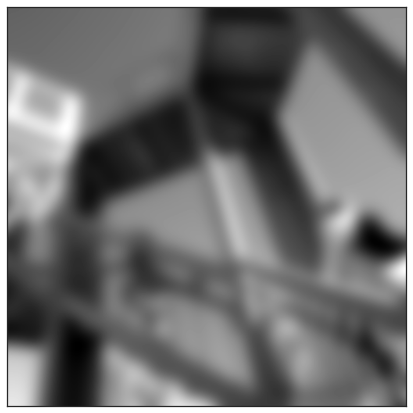

In [155]:
blurred = filters.gaussian_filter(image, sigma=10)
display_image(blurred)

There's a bunch of other filters at our disposal:

# References

- [Scipy.Signal tutorial](https://scipy.github.io/devdocs/tutorial/signal.html)
- [Scikit-Image docs](http://scikit-image.org/docs/0.11.x/)

## Colophon
This notebook was written by [Yoav Ram](http://www.yoavram.com) and is part of the _Python for Engineers_ course.

The notebook was written using [Python](http://pytho.org/) 3.4.4, [IPython](http://ipython.org/) 4.0.3 and [Jupyter](http://jupyter.org) 4.0.6.

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)